In [95]:
# https://hoonzi-text.tistory.com/19
# https://techblog-history-younghunjo1.tistory.com/114

import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [96]:
# 데이터 가져오기
df = pd.read_csv('./final.csv')
print('data size->', len(df))

data size-> 346


In [97]:
df.head()
# df[:5] # 상위 5개 출력

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,0,운영체제 서비스 (Operating System Services),운영체제 서비스,-0.005363,-0.000512,0.007147,-0.001610,0.006108,-0.001265,0.000054,...,0.002862,-0.001767,0.004287,-0.007653,0.001113,0.002021,0.007376,0.001316,-0.001175,0.005756
1,1,운영체제 사용자 인터페이스 (User Operating System Interface),운영체제 사용자 인터페이스,-0.000630,0.002080,0.001856,-0.001423,0.002517,-0.002896,-0.001903,...,0.002500,0.002282,0.003275,-0.001815,0.000834,0.003222,0.007290,-0.003162,0.001100,-0.003919
2,2,시스템 콜 (System Calls),시스템 콜,-0.003862,0.001073,-0.001253,0.003640,-0.002621,-0.001705,0.004142,...,0.003519,-0.001859,0.004261,-0.001774,0.006943,-0.001050,-0.000977,-0.001750,0.001026,0.004420
3,3,시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.002767,0.001186,-0.001221,0.001078,-0.001459,-0.004366,0.003231,...,0.005221,-0.000273,0.001127,-0.001968,0.006920,-0.002910,0.002440,-0.002243,-0.000867,0.001493
4,4,시스템 프로그램 (System Programs),시스템 프로그램,-0.004434,0.005097,0.002258,0.003769,-0.002179,-0.006612,0.004854,...,-0.001859,-0.000062,0.001234,-0.000921,0.010356,0.002786,-0.001200,-0.007887,-0.000642,0.000139


In [98]:
# NULL 값 존재 유무
print(df.isnull().values.any())

False


In [99]:
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [100]:
print(len(df)) # 개수 출력

346


In [101]:
okt = Okt() # 형태소 분석기 객체 생성

'''
# Okt의 nouns를 사용한 토큰화
noun_list = []
for content in df['tokenizedDocument']: 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)
'''

# Okt의 morph를 사용한 토큰화
tokenized_data = []
for sentence in df['tokenizedDocument']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    tokenized_data.append(tokenized_sentence)

# 명사 추출 방식의 토큰화에 사용
# df['nouns'] = noun_list
# tokenized_data = df['nouns'].tolist()

# morph 방식의 토큰화에 사용
df['tokenized_data'] = tokenized_data
tokenized_data = df['tokenized_data'].tolist()

최대 길이 : 34
평균 길이 : 5.07514450867052


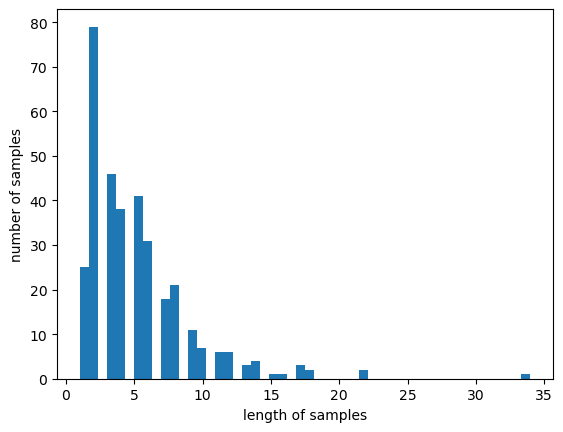

In [102]:
# 길이 분포 확인
print('최대 길이 :',max(len(review) for review in tokenized_data))
print('평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [103]:
tokenized_data[:5] # 상위 5개 출력

[['운영체제', '서비스'],
 ['운영체제', '사용자', '인터페이스'],
 ['시스템', '콜'],
 ['시스템', '콜', '유형'],
 ['시스템', '프로그램']]

In [104]:
df_temp = df.iloc[:346, 3:103]

In [105]:
df_temp

,dm1,dm2,dm3,dm4,dm5,dm6,dm7,dm8,dm9,dm10,...,dm91,dm92,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100
0,-0.005363,-0.000512,0.007147,-0.001610,0.006108,-0.001265,0.000054,0.008724,0.002953,-0.006172,...,0.002862,-0.001767,0.004287,-0.007653,0.001113,0.002021,0.007376,0.001316,-0.001175,0.005756
1,-0.000630,0.002080,0.001856,-0.001423,0.002517,-0.002896,-0.001903,0.006140,-0.005848,-0.003149,...,0.002500,0.002282,0.003275,-0.001815,0.000834,0.003222,0.007290,-0.003162,0.001100,-0.003919
2,-0.003862,0.001073,-0.001253,0.003640,-0.002621,-0.001705,0.004142,0.006940,-0.005425,0.001427,...,0.003519,-0.001859,0.004261,-0.001774,0.006943,-0.001050,-0.000977,-0.001750,0.001026,0.004420
3,-0.002767,0.001186,-0.001221,0.001078,-0.001459,-0.004366,0.003231,0.003249,-0.005552,0.002219,...,0.005221,-0.000273,0.001127,-0.001968,0.006920,-0.002910,0.002440,-0.002243,-0.000867,0.001493
4,-0.004434,0.005097,0.002258,0.003769,-0.002179,-0.006612,0.004854,0.009221,-0.000331,-0.005905,...,-0.001859,-0.000062,0.001234,-0.000921,0.010356,0.002786,-0.001200,-0.007887,-0.000642,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.000650,0.000841,-0.000704,-0.003150,0.001503,-0.006730,-0.001161,0.007772,0.003788,-0.006122,...,0.002095,0.001415,0.002351,-0.003470,0.001670,0.002757,-0.004071,-0.003942,-0.002429,0.003343
342,0.005307,-0.001297,0.001391,0.000625,-0.000349,-0.003978,0.004232,0.001470,-0.003387,-0.001689,...,0.000073,-0.003719,-0.004412,0.002500,0.000399,-0.003744,-0.001741,-0.005637,0.000676,-0.006125
343,0.001275,0.001371,0.001448,-0.001155,0.000650,-0.002269,-0.000866,0.005654,-0.000950,0.000396,...,0.003081,-0.002327,0.000382,-0.000070,0.001456,-0.001879,-0.000852,-0.002582,-0.001587,-0.002540
344,-0.001683,0.003580,-0.001254,0.005246,0.001063,-0.003277,0.001220,0.003984,0.003013,-0.001263,...,0.002042,0.003508,-0.003454,0.000900,0.004378,-0.000311,-0.001045,-0.008586,0.003327,-0.001097


## DBSCAN

sklearn.cluster.DBSCAN 이용. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

주요 파라미터:
- `eps`: 서로 이웃으로 간주되는 두 샘플 사이의 최대 거리. 기본값=0.5.
- `min_samples`: 어떤 샘플이 핵심 샘플로 간주되기 위해 자신의 이웃에 존재해야 하는 샘플의 개수(자신도 포함). 기본값=5.

주요 속성:
- `labels_`: 각 샘플의 클러스터 레이블(핵심 샘플의 인덱스). 이상치 샘플의 레이블은 -1.
- `core_sample_indices_`: 핵심 샘플의 인덱스. (핵심 샘플 개수,) 모양의 다차원 배열.
- `components_`: 핵심 샘플. (핵심 샘플 개수, 특성 개수) 모양의 다차원 배열.

선다형 객관식 출제를 할 때는, 선지 중 하나를 오답으로 넣을 것이므로 적어도 '선지의 개수 - 1' 개만큼의 같은 클러스터에 소속된 벡터가 필요하다. 즉, 선지 5개를 상정한다면 최소한 4개의 선지는 같은 클러스터에서 출제될 필요가 있다. 이러한 조건이 존재하므로 min_samples는 '선지의 개수 - 1' 로 하는 것이 적합하다고 판단했다.

In [106]:
# DBSCAN을 활용한 군집화
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.0001, min_samples=5, metric = "cosine")
result = model.fit_predict(df_temp) # DBSCAN의 .fit_predict() 함수를 사용

In [107]:
result

array([ 0, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
        0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1

In [108]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
result[:10]

array([ 0, -1, -1,  1,  2, -1, -1, -1, -1, -1], dtype=int64)

In [109]:
# 핵심 샘플들
model.components_[:5]

array([[-5.3632534e-03, -5.1233290e-04,  7.1468106e-03, -1.6104358e-03,
         6.1082540e-03, -1.2651256e-03,  5.4116710e-05,  8.7244880e-03,
         2.9530262e-03, -6.1718663e-03, -3.2745772e-03, -8.3140080e-03,
        -6.7067323e-03,  2.6689612e-03, -1.1047258e-03, -8.4282180e-04,
         3.9577167e-03,  4.4583380e-03,  1.2940830e-03, -2.8934980e-03,
        -6.6879010e-04, -1.5374923e-03,  4.6822470e-03, -1.2766756e-03,
         3.4914433e-03,  4.9642930e-03, -6.9199335e-03,  6.2957252e-03,
        -2.5102430e-03,  7.9392920e-03,  1.7739141e-03, -1.0980783e-03,
         4.5934540e-04, -3.5536927e-03, -9.4795670e-04, -2.4342160e-03,
        -9.7307840e-05, -1.5218211e-03,  5.8128275e-03,  3.8684942e-03,
         2.8204813e-03, -6.9415686e-04, -5.7503274e-03, -8.2250434e-04,
        -5.5344393e-03, -1.1902754e-03,  7.0762504e-03, -3.6873830e-03,
        -1.9406760e-03,  3.7387626e-03,  7.7799493e-03, -8.7066200e-03,
         1.6096580e-04, -1.2901895e-03, -1.3186177e-04,  2.46882

In [110]:
# 핵심 샘플들의 인덱스
model.core_sample_indices_[:10]

array([ 0,  3,  4, 14, 17, 22, 28, 39, 46, 53], dtype=int64)

In [111]:
df['result'] = result

In [112]:
df.head()

,Unnamed: 0,Document,tokenizedDocument,dm1,dm2,dm3,dm4,dm5,dm6,dm7,...,dm93,dm94,dm95,dm96,dm97,dm98,dm99,dm100,tokenized_data,result
0,0,운영체제 서비스 (Operating System Services),운영체제 서비스,-0.005363,-0.000512,0.007147,-0.001610,0.006108,-0.001265,0.000054,...,0.004287,-0.007653,0.001113,0.002021,0.007376,0.001316,-0.001175,0.005756,"[운영체제, 서비스]",0
1,1,운영체제 사용자 인터페이스 (User Operating System Interface),운영체제 사용자 인터페이스,-0.000630,0.002080,0.001856,-0.001423,0.002517,-0.002896,-0.001903,...,0.003275,-0.001815,0.000834,0.003222,0.007290,-0.003162,0.001100,-0.003919,"[운영체제, 사용자, 인터페이스]",-1
2,2,시스템 콜 (System Calls),시스템 콜,-0.003862,0.001073,-0.001253,0.003640,-0.002621,-0.001705,0.004142,...,0.004261,-0.001774,0.006943,-0.001050,-0.000977,-0.001750,0.001026,0.004420,"[시스템, 콜]",-1
3,3,시스템 콜 유형 (Types of System Calls),시스템 콜 유형,-0.002767,0.001186,-0.001221,0.001078,-0.001459,-0.004366,0.003231,...,0.001127,-0.001968,0.006920,-0.002910,0.002440,-0.002243,-0.000867,0.001493,"[시스템, 콜, 유형]",1
4,4,시스템 프로그램 (System Programs),시스템 프로그램,-0.004434,0.005097,0.002258,0.003769,-0.002179,-0.006612,0.004854,...,0.001234,-0.000921,0.010356,0.002786,-0.001200,-0.007887,-0.000642,0.000139,"[시스템, 프로그램]",2


In [113]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['Document']:
            print(title) # 토큰별로 나타내도록 한다.
        print()

cluster num : 1
 시스템 콜 유형 (Types of System Calls)
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  

cluster num : 2
 시스템 프로그램 (System Programs)
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
 시스템 프로그램



## k-평균

sklearn.cluster.Kmeans 이용. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

주요 파라미터:
- `n_clusters`: 클러스터 수(k). 기본값=8.
- `init`: 초기화 방법. {'k-means++', 'random'}. 기본값='k-means++'.
- `n_init`: k-평균 알고리즘이 서로 다른 센트로이드 시드로 실행되는 횟수. 기본값=10. 이너셔(inertia) 기준으로 가장 좋은 결과가 리턴됨.

주요 속성:
- `inertia_`: 이너셔
- `cluster_centers_`: 각 클러스터 중심의 좌표. (클러스터 수, 특성 개수) 모양의 다차원 배열.
- `labels_`: 클러스터링 결과 각 샘플이 속한 클러스터 레이블(인덱스). (샘플 개수,) 모양의 다차원 배열.

우선은 DBSCAN에서 eps를 0.0001, min_samples를 4로 설정했을 때 나타난 클러스터 개수인 14개로 분류해본다.

In [114]:
# K-means로 군집 개수를 수동으로 정해서 문서 군집화시키기
from sklearn.cluster import KMeans
import numpy as np

# 랜덤하게 실행되는 부분들에 대해 다음에 실행해도 동일한 결과를 얻기 위해 설정
# random_state는 여러 번 시도했을 때도 학습 결과가 동일하도록 random 함수의 값을 고정시키는 seed의 역할을 수행한다. 
# 값이 바뀌면 다른 값으로 고정된다.
seed = 11 
rng = np.random.default_rng(seed)

# 일단 DBSCAN에서 나온 14개 클러스터로 분류
k = 14
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
# 비지도 학습이니 feature로만 학습시키고 예측
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_DBSCAN'] = result_kmeans
# print(df.sort_values(by=['cluster_label_kmeans']))

In [115]:
for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

11
12
4
4
7
5
6
11
11
4
13
5
0
5
11
2
2
11
5
12
5
5
11
5
2
2
1
5
11
5
4
5
5
1
9
5
3
5
5
11
5
5
5
5
5
1
11
4
5
5
5
5
5
11
4
1
5
5
1
12
5
5
7
5
12
5
2
5
1
12
12
1
5
5
5
4
5
5
1
12
5
1
5
5
1
4
5
5
1
4
4
1
5
5
5
1
4
1
4
4
4
4
4
4
4
4
1
5
4
8
4
4
4
5
1
4
5
5
1
4
5
2
11
5
4
4
5
5
5
2
1
5
5
5
5
2
5
4
9
9
9
1
1
0
0
1
0
1
4
9
1
1
0
3
5
1
5
1
1
4
1
5
1
1
5
5
4
7
1
1
4
1
1
2
5
5
5
5
5
1
5
4
2
5
4
1
1
1
7
2
5
4
7
5
9
1
5
5
2
3
11
7
9
5
1
5
5
5
1
7
9
5
5
5
5
2
5
3
5
5
7
11
1
4
4
5
5
4
5
5
5
5
1
13
5
5
5
1
5
5
1
1
1
1
5
1
5
1
10
5
1
1
1
5
1
5
5
11
1
5
5
6
5
0
6
5
1
5
6
0
5
6
5
7
5
5
5
5
5
5
5
1
5
1
4
5
1
5
1
5
5
5
5
1
11
5
6
1
1
1
1
1
1
5
5
5
4
1
1
1
5
1
5
1
5
1
5
1
5
5
6
1
6
5
5
1
5
1
5
1
5
5
7
11
5
1
4
5
4
5
1
0
5
5
7
2


In [116]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([11, 12,  4,  4,  7,  5,  6, 11, 11,  4, 13,  5,  0,  5, 11,  2,  2,
       11,  5, 12,  5,  5, 11,  5,  2,  2,  1,  5, 11,  5,  4,  5,  5,  1,
        9,  5,  3,  5,  5, 11,  5,  5,  5,  5,  5,  1, 11,  4,  5,  5,  5,
        5,  5, 11,  4,  1,  5,  5,  1, 12,  5,  5,  7,  5, 12,  5,  2,  5,
        1, 12, 12,  1,  5,  5,  5,  4,  5,  5,  1, 12,  5,  1,  5,  5,  1,
        4,  5,  5,  1,  4,  4,  1,  5,  5,  5,  1,  4,  1,  4,  4,  4,  4,
        4,  4,  4,  4,  1,  5,  4,  8,  4,  4,  4,  5,  1,  4,  5,  5,  1,
        4,  5,  2, 11,  5,  4,  4,  5,  5,  5,  2,  1,  5,  5,  5,  5,  2,
        5,  4,  9,  9,  9,  1,  1,  0,  0,  1,  0,  1,  4,  9,  1,  1,  0,
        3,  5,  1,  5,  1,  1,  4,  1,  5,  1,  1,  5,  5,  4,  7,  1,  1,
        4,  1,  1,  2,  5,  5,  5,  5,  5,  1,  5,  4,  2,  5,  4,  1,  1,
        1,  7,  2,  5,  4,  7,  5,  9,  1,  5,  5,  2,  3, 11,  7,  9,  5,
        1,  5,  5,  5,  1,  7,  9,  5,  5,  5,  5,  2,  5,  3,  5,  5,  7,
       11,  1,  4,  4,  5

DBSCAN에서 eps를 0.0001, min_samples를 4로 설정했을 때 나타난 클러스터 개수인 14개로 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [117]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_DBSCAN'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
 운영체제를 구성하는 다양한 방법에 대해 논의
 장치 관리 (Device management)
장치 요청, 장치 방출 (request device, release device)
장치 속성 획득 및 설정 (get device attributes, set device attributes)
프로세스, 파일, 장치 속성의 획득과 설정(get and set process, file, or device attributes)
 다양한 방법으로 운영체제의 구성을 할 수 있다
 최초의 UNIX
 운영체제를 하드웨어가 시작할 수 있도록 하드웨어에게 알려야 한다

kmeans cluster num : 1
입출력 연산 (I/O)
 파일과 디렉토리 찾기
 디버깅 장치는 사용자와 개발자의 효율적인 시스템 사용을 향상시킬수 있다 
보호와 보안(protection and security)
 시스템 전체에 예방책이 제정되어 한다 
 시스템 프로그램으로 명령 구현 (UNIX)– 명령 해석기 프로그램 크기가 작아짐– 새로운 명령을 추가해도 셸을 변경시킬 필요가 없다 – 예 : rm file txt (p )명령해석기명령 명령 명령해석기명령 명령 
마우스, 키보드와 모니터 사용
Unix와 Linux는 선택적인 GUI(CDE, KDE, GNOME)를 가진 CLI이다   
마우스 사용이 불가능하고바람직하지 않음
keyboard for text entry) 사용 Springboard
 대부분 직접적인 시스템 콜 사용보다는 고급의 Application Program Interface (API)를 통해 접근한다 
 가장 많이 사용되는 APIs
 이식성이 높은 유닉스 응용 프로그램을 개발하기 위한 목적 
sequence to copy the contents of one file to another file(UNIX cp 명령)cp in txt out txt 
개발자는 API를 제대로 사용하고,운영체제가 시스템 콜의 결과로무슨 일을 하는지 알면 된다  
 문제는 레지스

이번에는 병합 클러스터링에서 나온 클러스터 개수인 26개로 시도한다.

In [118]:
k = 26
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Dendrogram'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

6
19
14
14
3
11
9
8
4
0
15
8
11
11
6
5
0
6
8
19
11
11
6
8
5
5
2
1
6
8
25
21
21
21
25
1
16
11
11
6
8
1
1
1
11
0
6
0
8
11
11
21
8
6
0
21
11
11
0
19
17
17
0
11
19
17
5
1
11
19
1
11
1
11
8
0
2
11
11
19
2
7
11
11
7
14
8
11
0
0
14
7
2
5
11
11
0
20
14
0
0
14
0
0
14
14
11
11
0
13
0
0
0
11
2
0
11
11
7
0
11
5
8
11
14
14
11
4
11
5
11
2
11
11
11
5
11
14
10
25
25
2
11
10
11
2
11
11
14
10
2
0
11
16
2
2
1
11
11
14
21
1
0
11
11
1
14
3
23
5
14
5
0
5
4
1
1
11
1
5
11
0
5
11
14
1
1
1
3
0
0
0
3
2
10
11
11
1
5
16
24
3
10
11
11
11
2
2
0
3
25
11
11
11
2
5
2
16
11
2
3
24
11
0
0
11
8
0
11
11
8
11
11
15
11
11
11
11
11
11
11
2
11
11
12
11
11
22
5
11
11
7
2
2
11
0
21
22
1
2
8
9
8
11
9
2
11
9
9
18
2
9
11
3
11
0
1
11
11
11
11
11
11
0
0
11
11
11
11
11
11
2
11
21
8
11
9
12
0
22
11
11
11
11
9
12
0
11
2
11
2
11
11
11
9
11
2
11
11
2
9
2
9
11
11
5
11
11
11
2
11
12
3
4
11
0
0
11
0
11
1
11
1
1
0
0


In [119]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([ 6, 19, 14, 14,  3, 11,  9,  8,  4,  0, 15,  8, 11, 11,  6,  5,  0,
        6,  8, 19, 11, 11,  6,  8,  5,  5,  2,  1,  6,  8, 25, 21, 21, 21,
       25,  1, 16, 11, 11,  6,  8,  1,  1,  1, 11,  0,  6,  0,  8, 11, 11,
       21,  8,  6,  0, 21, 11, 11,  0, 19, 17, 17,  0, 11, 19, 17,  5,  1,
       11, 19,  1, 11,  1, 11,  8,  0,  2, 11, 11, 19,  2,  7, 11, 11,  7,
       14,  8, 11,  0,  0, 14,  7,  2,  5, 11, 11,  0, 20, 14,  0,  0, 14,
        0,  0, 14, 14, 11, 11,  0, 13,  0,  0,  0, 11,  2,  0, 11, 11,  7,
        0, 11,  5,  8, 11, 14, 14, 11,  4, 11,  5, 11,  2, 11, 11, 11,  5,
       11, 14, 10, 25, 25,  2, 11, 10, 11,  2, 11, 11, 14, 10,  2,  0, 11,
       16,  2,  2,  1, 11, 11, 14, 21,  1,  0, 11, 11,  1, 14,  3, 23,  5,
       14,  5,  0,  5,  4,  1,  1, 11,  1,  5, 11,  0,  5, 11, 14,  1,  1,
        1,  3,  0,  0,  0,  3,  2, 10, 11, 11,  1,  5, 16, 24,  3, 10, 11,
       11, 11,  2,  2,  0,  3, 25, 11, 11, 11,  2,  5,  2, 16, 11,  2,  3,
       24, 11,  0,  0, 11

병합 클러스터링에서 나온 클러스터 개수인 26개를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [120]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Dendrogram'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
 시스템 부팅 (System Boot) 
 사용자 프로그램의 적절한 실행과 시스템의 효율적 운용을 담당한다 
 디버깅 장치는 사용자와 개발자의 효율적인 시스템 사용을 향상시킬수 있다 
 시스템 자원을 공유하여 시스템의 효율적인 운영을 보장하는 서비스
 시스템 자원을 공유하여 시스템의 효율적인 운영을 보장하는 서비스
 시스템 전체에 예방책이 제정되어 한다 
커널 또는 시스템 프로그램으로 구현
 많은 시스템은 CLI와 GUI 인터페이스를 모두 가지고 있다 
 대부분 직접적인 시스템 콜 사용보다는 고급의 Application Program Interface (API)를 통해 접근한다 
사용자 프로그램 -> API 사용 -> 시스템콜 
 파일의 내용을 다른 파일에 복사하는 시스템 콜의 순서(p )
 통상적으로, 각 시스템 콜에 대하여 숫자가 부여된다
시스템 콜 인터페이스가 이 숫자로 된 인덱스를 가진 테이블을 관리한다  
운영체제 커널 내에 있는 요청된 시스템 콜을 하고
시스템 콜의 반환 상태와 해당 반환 값을 반환한다   
 실행시간 지원 시스템(컴파일러에 포함된라이브러리에 내장된 함수의집합)이 운영체제의 시스템콜을 연결해 주는 시스템 콜인터페이스를 제공한다 
시스템 콜 파라미터 전달
 원하는 시스템 콜 이름 외에 많은 정보가 일반적으로 필요하다
필요한 정보의 종류와 양은 운영제제와 시스템 콜에 따라 다르다 (* 시스템콜은 일반적인 용어다  시스템 별로 시스템 콜에 해당하는 용어가 있다 )
시스템 콜 파라미터 전달 : 테이블
시스템 콜 파라미터 전달 : 스택
시스템 데이터의 설정과 획득(get system data, set system data)
 다중 프로그래밍 시스템
 시스템이 시동될 때 하나의명령해석기 호출
 쉘이 fork() 시스템 콜을 실행하여 프로세스 생성
 시스템 프로그램(시스템 유틸리티라고도 함)은 프로그램 개발과 실행에편리한 환경을 제공한다  
일부는 시스템 콜에 대한 사용자 인터페이스, 다른 것들은 이보다 

k-means의 k 값, 즉 클러스터 개수 설정의 근거는 하나뿐만이 아닐 것이다. 물론, 실질적으로 의미가 있는 형태로의 클러스터링이 될 것이라 기대하는 근거는 있어야 한다. 이러한 근거는 강의자료의 단원 수, 강의자료에서 나온 개념 수, PDF의 장 수 등이 있을 것이다. 

이번에는 강의자료의 단원 수로 시도해보고자 한다. 

우리가 사용한 강의자료인 운영체제 2장에서 나온 단원은 '운영체제 서비스', '운영체제 사용자 인터페이스', '시스템 콜', '시스템 콜 유형', '시스템 프로그램', '운영체제 설계 및 구현', '운영체제 구조', '운영체제 디버깅', '운영체제 생성', '시스템 부팅' 이렇게 총 10개가 있다.

In [121]:
k = 10
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Sections'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

1
1
4
4
3
1
5
1
1
4
0
1
1
2
1
0
0
1
1
0
0
0
1
1
3
0
2
2
1
1
4
2
2
2
2
2
6
2
0
1
1
2
1
0
2
8
1
8
2
0
2
2
2
1
8
2
2
2
8
0
0
0
3
0
0
0
0
0
0
0
0
2
2
0
0
8
2
8
8
2
2
7
0
2
7
4
0
2
8
4
4
7
2
2
2
2
4
0
4
8
4
4
4
4
4
4
8
2
4
9
4
4
4
0
0
4
0
0
7
4
1
0
1
0
4
4
2
2
2
0
2
2
2
0
0
0
2
4
2
2
2
0
2
2
2
0
2
2
4
2
2
8
2
6
2
8
0
2
2
4
2
2
8
2
2
2
4
3
8
4
4
2
8
0
2
0
0
2
2
2
0
4
0
2
4
2
2
2
3
0
0
4
3
2
2
2
2
2
0
6
1
3
2
2
2
0
2
2
8
3
2
2
2
2
2
0
2
6
8
2
3
1
2
4
4
2
0
8
1
1
1
0
2
4
0
8
2
8
2
2
8
2
2
8
8
2
0
0
0
2
8
7
2
2
0
8
2
1
2
2
1
5
1
1
5
2
8
2
5
0
2
5
1
3
2
8
8
1
8
8
0
8
8
2
8
2
2
0
8
0
2
2
8
2
1
0
5
8
8
8
8
8
8
8
8
8
4
2
2
8
8
8
8
8
8
2
0
8
8
2
5
2
5
0
2
0
2
8
2
2
8
0
3
1
1
8
8
2
4
0
2
1
0
0
3
0


In [122]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([1, 1, 4, 4, 3, 1, 5, 1, 1, 4, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 3, 0, 2, 2, 1, 1, 4, 2, 2, 2, 2, 2, 6, 2, 0, 1, 1, 2, 1, 0,
       2, 8, 1, 8, 2, 0, 2, 2, 2, 1, 8, 2, 2, 2, 8, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 8, 2, 8, 8, 2, 2, 7, 0, 2, 7, 4, 0, 2,
       8, 4, 4, 7, 2, 2, 2, 2, 4, 0, 4, 8, 4, 4, 4, 4, 4, 4, 8, 2, 4, 9,
       4, 4, 4, 0, 0, 4, 0, 0, 7, 4, 1, 0, 1, 0, 4, 4, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 4, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 4, 2, 2, 8, 2, 6,
       2, 8, 0, 2, 2, 4, 2, 2, 8, 2, 2, 2, 4, 3, 8, 4, 4, 2, 8, 0, 2, 0,
       0, 2, 2, 2, 0, 4, 0, 2, 4, 2, 2, 2, 3, 0, 0, 4, 3, 2, 2, 2, 2, 2,
       0, 6, 1, 3, 2, 2, 2, 0, 2, 2, 8, 3, 2, 2, 2, 2, 2, 0, 2, 6, 8, 2,
       3, 1, 2, 4, 4, 2, 0, 8, 1, 1, 1, 0, 2, 4, 0, 8, 2, 8, 2, 2, 8, 2,
       2, 8, 8, 2, 0, 0, 0, 2, 8, 7, 2, 2, 0, 8, 2, 1, 2, 2, 1, 5, 1, 1,
       5, 2, 8, 2, 5, 0, 2, 5, 1, 3, 2, 8, 8, 1, 8, 8, 0, 8, 8, 2, 8, 2,
       2, 0, 8, 0, 2, 2, 8, 2, 1, 0, 5, 8, 8, 8, 8,

강의자료의 단원의 개수인 10개를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [123]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Sections'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
목표 (Objectives)
 운영체제는 사용자(또는 프로그램) 들에게 프로그램의 실행 환경을 제공한다  
 사용자 프로그램의 적절한 실행과 시스템의 효율적 운용을 담당한다 
사용자 인터페이스
 명령어 라인 인터페이스 (Command Line Interface)– 문자열 명령 입력
 배치 인터페이스 (Batch Interface)– 명령어 또는 명령어 집합을 파일로 제공
 프로그램을 메모리에 적재, 실행, 실행 종료 (정상 또는 비정상)
 통신은 메시지 전달 기법 (운영체제가 패킷을 이동하는데 관여함) 또는 공유 메모리를 이용 
 오류는 CPU, 메모리, 입출력 장치, 사용자 프로그램 등에서 발생 가능
 다수의 사용자나 다수의 작업들이 동시에 실행될 때 각각에 자원을할당해야 함– 자원 종류 - CPU cycles, main memory, file storage, I/O devices 
사용자 인터페이스 – CLI
 명령어 해석기 (Command interpreter)
CLI, 또는 명령어 해석기를 통해 명령어 직접 입력
선택 가능한 여러 개의 명령어 해석기 (shells) 제공 – UNIX, Linux 
사용자 인터페이스 – CLI
 명령어 해석기 (Command interpreter)
역할 : 사용자의 명령어를 가져와 그것을 실행한다 
 명령어 해석기가 명령을 실행하는 코드를 포함하는 경우도 있음– 명령어 개수가 프로그램 크기를 결정
 시스템 프로그램으로 명령 구현 (UNIX)– 명령 해석기 프로그램 크기가 작아짐– 새로운 명령을 추가해도 셸을 변경시킬 필요가 없다 – 예 : rm file txt (p )명령해석기명령 명령 명령해석기명령 명령 
사용자 인터페이스 – GUI
 사용자 친화적인 상징 인터페이스(metaphor interface)
인터페이스 내의 대상에 대한 다양한 마우스 버튼으로 다수의 행위가발생한다(정보 제공, 선택사항, 실행, 폴더 열기 등)
 년대 초 Xerox PARC 연구에서 시작
액션과 선택은 

이번에는 강의자료에서 나온 개념 수 시도해보고자 한다. 

우리가 사용한 강의자료인 운영체제 2장에서 나온 개념을 정리해보았다.

'운영체제 서비스', '사용자 인터페이스', '프로그램 실행', '입출력 연산', '파일 시스템', '통신', '메시지 전달', '공유 메모리', '오류 탐지', '자원 할당', '회계', '보호', '보안', 'CLI', 'GUI', '터치스크린', '시스템 콜' 'API', '프로세서 제어', '파일 관리', '장치 관리', '정보 관리', '보호', '시스템 프로그램', '사용자 목표', '시스템 목표', '정책', '기법', '계층적 접근', '마이크로 커널', '모듈', '하이브리드 시스템', '디버깅', '시스템 부트'

이렇게 총 33개의 개념이 있으나, 사용자마다 '개념'으로 정의하는 부분이 다를 수 있다는 리스크가 존재한다. 이를 해결하기 위해 사용자로부터 직접 개념의 수를 입력받아 k 값으로 사용하는 방법을 고려해봄직하다고 여겨진다.

In [124]:
k = 33
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Subjects'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

14
28
6
6
2
3
0
3
24
32
28
3
3
3
14
5
32
14
3
28
4
4
14
3
5
27
27
10
14
3
19
4
19
19
19
10
9
1
10
14
3
10
3
10
3
32
14
32
1
4
1
22
3
14
32
8
10
4
32
28
13
13
2
4
28
13
27
10
15
28
28
4
10
4
3
32
1
1
7
4
4
11
4
27
11
6
32
4
32
32
6
11
4
27
4
7
19
15
6
32
32
6
32
32
6
6
7
3
32
20
32
6
32
3
4
32
3
10
11
32
3
27
3
3
6
6
19
24
7
5
15
1
3
10
10
27
1
6
23
19
19
4
15
23
15
4
15
4
6
23
15
15
15
9
4
7
10
17
4
6
8
1
32
7
10
10
6
2
12
27
6
27
32
27
24
10
10
10
10
27
4
32
5
3
6
7
7
10
2
32
32
32
2
27
23
17
4
10
5
9
25
2
23
4
17
10
4
4
32
2
19
4
4
4
4
5
4
9
1
4
2
25
1
32
32
4
3
32
3
3
3
4
4
28
3
3
3
7
4
4
7
4
4
4
16
4
4
30
29
3
4
11
4
10
32
32
26
0
10
4
3
0
3
3
21
4
7
4
18
18
4
18
3
2
4
32
10
3
7
4
10
4
4
4
32
4
4
10
4
10
7
4
4
4
31
4
32
16
32
30
4
4
4
4
4
16
32
3
4
4
4
4
4
7
4
4
27
7
7
4
21
4
0
4
3
27
10
32
4
4
32
16
2
24
3
32
32
4
32
10
7
3
10
10
2
32


In [125]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([14, 28,  6,  6,  2,  3,  0,  3, 24, 32, 28,  3,  3,  3, 14,  5, 32,
       14,  3, 28,  4,  4, 14,  3,  5, 27, 27, 10, 14,  3, 19,  4, 19, 19,
       19, 10,  9,  1, 10, 14,  3, 10,  3, 10,  3, 32, 14, 32,  1,  4,  1,
       22,  3, 14, 32,  8, 10,  4, 32, 28, 13, 13,  2,  4, 28, 13, 27, 10,
       15, 28, 28,  4, 10,  4,  3, 32,  1,  1,  7,  4,  4, 11,  4, 27, 11,
        6, 32,  4, 32, 32,  6, 11,  4, 27,  4,  7, 19, 15,  6, 32, 32,  6,
       32, 32,  6,  6,  7,  3, 32, 20, 32,  6, 32,  3,  4, 32,  3, 10, 11,
       32,  3, 27,  3,  3,  6,  6, 19, 24,  7,  5, 15,  1,  3, 10, 10, 27,
        1,  6, 23, 19, 19,  4, 15, 23, 15,  4, 15,  4,  6, 23, 15, 15, 15,
        9,  4,  7, 10, 17,  4,  6,  8,  1, 32,  7, 10, 10,  6,  2, 12, 27,
        6, 27, 32, 27, 24, 10, 10, 10, 10, 27,  4, 32,  5,  3,  6,  7,  7,
       10,  2, 32, 32, 32,  2, 27, 23, 17,  4, 10,  5,  9, 25,  2, 23,  4,
       17, 10,  4,  4, 32,  2, 19,  4,  4,  4,  4,  5,  4,  9,  1,  4,  2,
       25,  1, 32, 32,  4

강의자료에 나온 개념의 수를 33개로 가정하고 이를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [126]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Subjects'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
 운영체제 구조 (Operating System Structure)
Language)로 된 운영체제
운영체제 구조 (structure)
 IOS와 유사한 계층 구조

kmeans cluster num : 1
 동일한 컴퓨터 또는 네트워크로 연결된 컴퓨터에 있는 프로세스 간정보 교환
자원 할당(resource allocation)
 자원의 일부는 특별한 할당 코드를 가지며, 동일한 컴퓨터 또는네트워크로 연결된 컴퓨터에 있는 프로세스 간 정보 교환 가능
Microsoft 윈도우는 CLI 명령어 셸을 가지고 있는 GUI이다 
Apple Mac OS X는 UNIX 커널과 셸을 가지고 있는 Aqua GUI이다 
시간 대기
프로세스 간에 공유 자료 접근을 관리하는 locks 
자원 접근을 제어(Contro
프로세스, 사용자, 컴퓨터 시스템 간에 가상 접속을 이루기 위한 기법을제공한다
부팅 시 살아남

kmeans cluster num : 2
 시스템 프로그램 (System Programs)
커널 또는 시스템 프로그램으로 구현
 C 프로그램이 printf() 호출 
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
시스템 프로그램 (System Programs)  
 시스템 프로그램
 프로그램 또는Windows Task Manager 
 GRUB(GRand Unified Bootloader) : Linux 시스템을 위한 오픈소스부트스트랩 프로그램

kmeans cluster num : 3
 운영체제 설계 및 구현 (Operating System Design and Implementation)
 운영체제 디버깅 (Operating System Debugging)
 운영체제가 사용자, 프로세스, 다른 시스템에 제공하는 서비스 설명
 운영체제를 구성하는 다양한 방법에 대해 논의
 운

이번에는 PDF의 장 수로 시도해보고자 한다. 운영체제 2장의 PDF 장 수는 총 64장이다.

여러 개념을 같은 장에서 설명하는 경우도 있고, 반대로 하나의 개념을 여러 장에 나누어 설명하는 경우도 존재하는 경우도 있기 때문에 그리 신뢰성 있는 클러스터링 결과가 나오진 않을 것으로 예상된다.

In [127]:
k = 64
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans_Pages'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

12
37
10
32
20
40
36
51
31
1
19
1
53
53
12
8
8
12
39
37
9
9
12
39
30
8
55
54
12
39
57
57
57
57
57
54
5
2
54
12
39
22
40
54
40
1
12
1
52
9
2
23
3
12
1
14
9
54
1
37
17
17
8
9
37
17
9
54
54
37
54
7
54
9
9
1
9
0
27
9
9
58
9
9
46
10
1
9
1
1
10
7
35
7
54
54
1
13
10
1
1
10
1
1
10
1
27
40
1
25
1
1
1
53
9
1
53
53
58
1
53
8
53
53
32
10
52
50
27
30
44
2
40
9
3
8
2
32
34
57
57
15
44
34
44
15
44
59
32
34
44
44
44
5
9
27
3
16
59
32
14
52
1
27
44
54
10
20
28
61
10
62
1
8
50
3
3
54
54
62
54
1
30
54
1
29
29
22
20
8
1
1
20
7
34
16
43
11
30
5
41
20
34
9
16
9
9
9
1
20
57
9
9
43
9
30
9
5
9
54
20
41
48
1
1
2
39
1
40
40
39
9
54
19
9
40
40
42
3
56
42
9
9
9
21
9
3
33
18
40
7
7
7
9
54
8
43
36
54
60
39
36
40
53
6
3
27
4
7
24
7
7
40
20
9
4
4
4
4
4
4
4
9
38
0
0
9
0
45
26
2
60
9
63
49
3
1
47
1
33
7
9
45
0
4
45
1
40
7
9
9
7
0
27
4
54
7
27
4
9
6
9
4
0
9
9
9
1
9
9
9
54
20
31
40
1
1
9
1
9
9
40
0
54
8
0


In [128]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([12, 37, 10, 32, 20, 40, 36, 51, 31,  1, 19,  1, 53, 53, 12,  8,  8,
       12, 39, 37,  9,  9, 12, 39, 30,  8, 55, 54, 12, 39, 57, 57, 57, 57,
       57, 54,  5,  2, 54, 12, 39, 22, 40, 54, 40,  1, 12,  1, 52,  9,  2,
       23,  3, 12,  1, 14,  9, 54,  1, 37, 17, 17,  8,  9, 37, 17,  9, 54,
       54, 37, 54,  7, 54,  9,  9,  1,  9,  0, 27,  9,  9, 58,  9,  9, 46,
       10,  1,  9,  1,  1, 10,  7, 35,  7, 54, 54,  1, 13, 10,  1,  1, 10,
        1,  1, 10,  1, 27, 40,  1, 25,  1,  1,  1, 53,  9,  1, 53, 53, 58,
        1, 53,  8, 53, 53, 32, 10, 52, 50, 27, 30, 44,  2, 40,  9,  3,  8,
        2, 32, 34, 57, 57, 15, 44, 34, 44, 15, 44, 59, 32, 34, 44, 44, 44,
        5,  9, 27,  3, 16, 59, 32, 14, 52,  1, 27, 44, 54, 10, 20, 28, 61,
       10, 62,  1,  8, 50,  3,  3, 54, 54, 62, 54,  1, 30, 54,  1, 29, 29,
       22, 20,  8,  1,  1, 20,  7, 34, 16, 43, 11, 30,  5, 41, 20, 34,  9,
       16,  9,  9,  9,  1, 20, 57,  9,  9, 43,  9, 30,  9,  5,  9, 54, 20,
       41, 48,  1,  1,  2

PDF의 장 수인 64를 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [129]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans_Pages'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
Apple Mac OS X는 UNIX 커널과 셸을 가지고 있는 Aqua GUI이다 
마이크로 커널 시스템 구조 (Microkerne
 커널이 커져 관리가 어려워져 가능한 많은 기능을 커널에서 사용자 공간으로옮겨 커널을 최소화
Mac OS X 커널(Darwin)은 부분적으로 Mach에 기초함
각 모듈은 필요한 시점에 커널 내에 적재
커널 구성 : Mach 마이크로 커널, BSD Unix 일부, 입출력 도구, 동적 적재모듈인 커널 확장graphica
 Linux 커널을 기초로 수정
ROM 또는 EPROM(Erasable Programmable ROM)에 있는 bootstrap loader라 불리는 작은 코드가 커널을 찾아서 메모리에 적재하고 커널을구동시킨다
 커널이 적재되어 시스템이 실행(running)되게 된다 

kmeans cluster num : 1
 시스템 부팅 (System Boot) 
 운영체제가 사용자, 프로세스, 다른 시스템에 제공하는 서비스 설명
 디버깅 장치는 사용자와 개발자의 효율적인 시스템 사용을 향상시킬수 있다 
 시스템 자원을 공유하여 시스템의 효율적인 운영을 보장하는 서비스
 시스템 자원을 공유하여 시스템의 효율적인 운영을 보장하는 서비스
 시스템 전체에 예방책이 제정되어 한다 
 많은 시스템은 CLI와 GUI 인터페이스를 모두 가지고 있다 
 시스템 콜(호출)은 운영체제가 제공하는 서비스에 대한 인터페이스를사용자에게 제공한다
 대부분 직접적인 시스템 콜 사용보다는 고급의 Application Program Interface (API)를 통해 접근한다 
사용자 프로그램 -> API 사용 -> 시스템콜 
 파일의 내용을 다른 파일에 복사하는 시스템 콜의 순서(p )
 통상적으로, 각 시스템 콜에 대하여 숫자가 부여된다
시스템 콜 인터페이스가 이 숫자로 된 인덱스를 가진 테이블을 관리한다  
운영체제 커널 내에 있는 요청된 시스템 콜을 하고
시스템 콜의 반환 상태와 해당 반환 값을 반환한다   
 

k-means 클러스터링은 k의 수, 즉 클러스터의 수를 지정해줘야 하기 때문에 지정한 k 값에 따라 성능이 달라진다.

적합한 k 값을 지정하기 위한 2가지 기법으로 엘보우 기법과 실루엣 점수가 있는데, 아래의 코드는 엘보우 기법으로, 반복문을 통해 k의 수를 지정한 범위 내에서 반복적으로 학습시킨다. 이 때, 그래프의 기울기가 급격히 변하는 부분이 적절한 k 값이라 할 수 있다.

In [130]:
# https://m.blog.naver.com/samsjang/221017639342

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


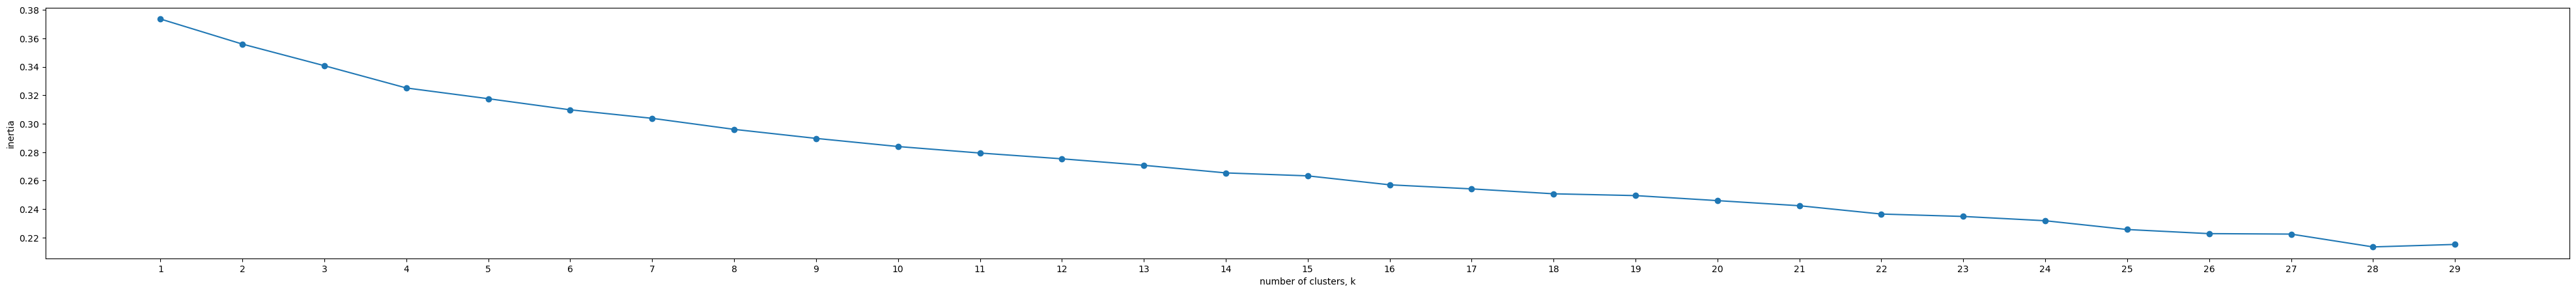

In [131]:
ks = range(1,30)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++'
    )
    model.fit(df_temp)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(50, 5))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

보이는 것처럼 그래프에는 딱히 기울기가 급격히 변하는 부분이 나타나지 않았다. 따라서 엘보우 기법으로는 적절한 k 값을 찾기 어려울 것으로 여겨진다.

적합한 k 값을 찾는 또다른 방법으로 실루엣 점수가 있다. 이 실루엣 점수가 가장 높은 k 값으로도 시도해 본다. 벡터의 총 개수가 435개이기 때문에 0부터 435를 범위로 정해서 가장 큰 실루엣 점수를 가지는 k 값을 찾아보려 했으나, 350 전후로 오류가 발생하여 300개로 시도해 보았다.

In [132]:
# 최적의 클러스터 개수 찾기: 실루엣 점수
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=seed).fit(df_temp) for k in range(1, 300)] # 최대 300
silhouette_scores = [silhouette_score(df_temp, model.labels_) for model in kmeans_per_k[1:]]

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


In [133]:
# print(silhouette_scores)
print('최대 실루엣 점수를 보인 k 값: ' + str(silhouette_scores.index(max(silhouette_scores))))
print('최대 실루엣 점수: ' + str(max(silhouette_scores)))

최대 실루엣 점수를 보인 k 값: 261
최대 실루엣 점수: 0.20956204378550533


최대 실루엣 점수를 나타낸 k값이 270이었으므로, 270으로 시도해 본다.

In [134]:
k = 270
model_kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=seed)
result_kmeans = model_kmeans.fit_predict(df_temp) # k-Means의 .fit_predict() 함수를 사용

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans'] = result_kmeans

for i in range(0, len(result_kmeans)):
    print(result_kmeans[i])

2
14
45
4
16
232
21
117
33
150
32
264
244
196
2
184
12
2
3
46
174
228
2
3
57
221
65
160
2
3
130
251
79
149
91
257
7
115
68
2
3
70
155
160
68
236
2
59
55
253
115
48
180
2
59
100
268
234
198
46
77
30
220
215
46
77
161
267
85
46
203
187
230
38
125
171
210
88
96
84
172
40
86
158
108
45
264
234
236
255
45
122
53
52
68
214
242
49
134
0
42
261
247
152
134
219
219
207
42
17
116
6
6
11
163
116
11
199
104
116
11
110
159
208
4
243
47
64
62
239
31
60
83
176
194
133
211
4
19
89
107
24
127
54
99
24
127
114
4
95
173
126
31
7
153
103
186
209
114
4
8
142
120
82
240
123
248
67
34
78
237
75
235
250
64
168
233
200
69
76
252
213
9
217
213
36
141
111
16
12
38
264
16
119
19
44
43
50
72
7
20
16
19
56
44
160
238
35
223
16
87
201
27
43
229
72
245
7
254
38
16
20
81
106
106
266
137
166
232
260
147
178
18
151
218
42
66
169
144
97
90
182
263
167
63
265
259
23
39
249
164
22
189
124
80
227
58
93
128
41
241
21
105
139
26
170
102
179
113
73
188
5
216
16
38
129
109
1
256
71
183
28
197
61
175
224
121
204
222
25
135
41
13

In [135]:
model_kmeans.labels_ # 클러스터링 수행 결과가 labels_ 속성에 저장됨

array([  2,  14,  45,   4,  16, 232,  21, 117,  33, 150,  32, 264, 244,
       196,   2, 184,  12,   2,   3,  46, 174, 228,   2,   3,  57, 221,
        65, 160,   2,   3, 130, 251,  79, 149,  91, 257,   7, 115,  68,
         2,   3,  70, 155, 160,  68, 236,   2,  59,  55, 253, 115,  48,
       180,   2,  59, 100, 268, 234, 198,  46,  77,  30, 220, 215,  46,
        77, 161, 267,  85,  46, 203, 187, 230,  38, 125, 171, 210,  88,
        96,  84, 172,  40,  86, 158, 108,  45, 264, 234, 236, 255,  45,
       122,  53,  52,  68, 214, 242,  49, 134,   0,  42, 261, 247, 152,
       134, 219, 219, 207,  42,  17, 116,   6,   6,  11, 163, 116,  11,
       199, 104, 116,  11, 110, 159, 208,   4, 243,  47,  64,  62, 239,
        31,  60,  83, 176, 194, 133, 211,   4,  19,  89, 107,  24, 127,
        54,  99,  24, 127, 114,   4,  95, 173, 126,  31,   7, 153, 103,
       186, 209, 114,   4,   8, 142, 120,  82, 240, 123, 248,  67,  34,
        78, 237,  75, 235, 250,  64, 168, 233, 200,  69,  76, 25

최대 실루엣 점수를 보인 k값인 270을 클러스터 개수로 정하여 분류했을 때를 기준으로 한 클러스터링 결과이다.

In [136]:
for cluster_num in set(model_kmeans.labels_):
    print("kmeans cluster num : {}".format(cluster_num))
    temp_df = df[df['cluster_label_kmeans'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['Document']:
        print(title)
    print()

kmeans cluster num : 0
 통상적으로, 각 시스템 콜에 대하여 숫자가 부여된다

kmeans cluster num : 1
 운영체제는 여러 개의 계층(layer, level)으로 구분

kmeans cluster num : 2
 운영체제 서비스 (Operating System Services)
운영체제 서비스 : View
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  
운영체제 서비스 (Operating System Services)  

kmeans cluster num : 3
 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스
 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스
 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스
 사용자 업무를 수행하는 데 필요한 기능을 제공하는 운영체제 서비스

kmeans cluster num : 4
 시스템 콜 유형 (Types of System Calls)
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  
시스템 콜 유형  

kmeans cluster num : 5
최초 UNIX는 제한적인 구조를 가졌다 

kmeans cluster num : 6
 원하는 시스템 콜 이름 외에 많은 정보가 일반적으로 필요하다
필요한 정보의 종류와 양은 운영제제와 시스템 콜에 따라 다르다 (* 시스템콜은 일반적인 용어다  시스템 별로 시스템 콜에 해당하는 용어가 있다 )

kmeans cluster num : 7
통신
 통신(Communications)
통신
 통신

kmeans cluster num : 8
 보호

kmeans cluster num : 9
Exec

실루엣 점수는 서로 다른 k 값을 가진 클러스터링 결과 간에도 비교할 수 있다. 클러스터의 수에 따라 다르게 시각화를 진행해 보았고, 균등하게 나올수록 클러스터링 품질이 좋다고 할 수 있다.

In [137]:
# https://zephyrus1111.tistory.com/193
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, init='k-means++')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

우선 DBSCAN의 14개와 병합 클러스터링의 26개를 비교해 본다. 병합 클러스터링의 26개가 더욱 높은 실루엣 점수를 나타냈다.

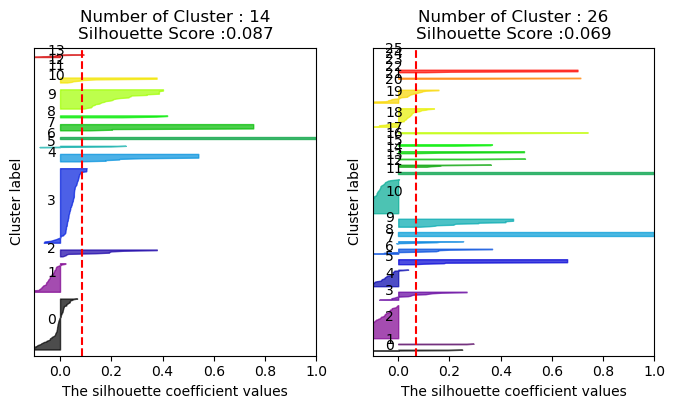

In [138]:
visualize_silhouette([14,26], df_temp)

다음으로, 단원 수인 10개와 개념 수인 33개를 비교해 본다. 개념 수인 33개의 실루엣 점수가 상대적으로 좋게 나왔다.

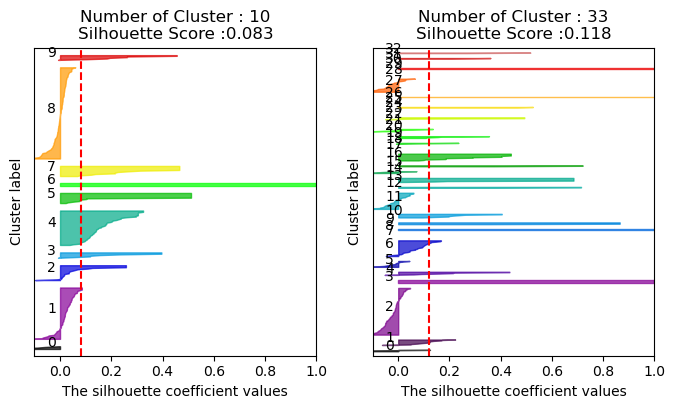

In [139]:
visualize_silhouette([10,33], df_temp)

PDF 페이지수인 64개와 최대 실루엣 점수를 보인 270개도 비교해 본다.

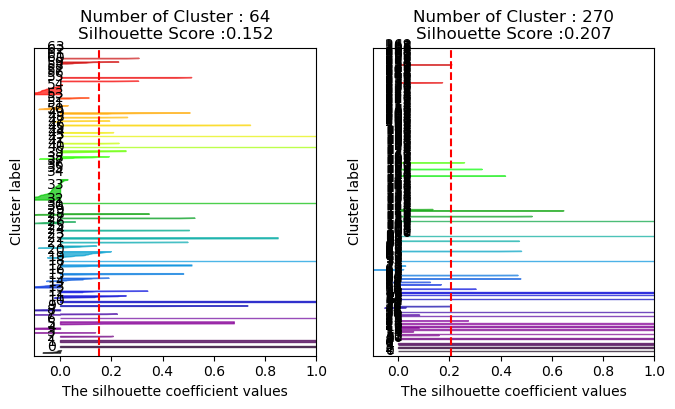

In [140]:
visualize_silhouette([64,270], df_temp)

결과적으로 클러스터 개수에 따른 실루엣 점수 순위는 다음과 같다. 전반적으로 클러스터 개수가 많아질수록 실루엣 점수가 높아져서 270에서 최고점에 도달하는 것을 알 수 있다. 하지만 최적의 클러스터 개수인 270개로 클러스터링해도 문제로서 유의미한 품질의 결과는 나타내지 못했다.

270개: 0.216<br />
64개: 0.159<br />
33개: 0.129<br />
26개: 0.11<br />
14개: 0.084<br />
10개: 0.056